## Preparation

In [1]:
# import all the necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# set_up options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

## Checkpoint 1: Data Cleaning 1

In [3]:
# Create companies dataframe and rounds2 dataframe
companies = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/d934844e-5182-4b58-b896-4ba2a499aa57/companies.txt', sep='\t', encoding = 'ISO-8859-1')
rounds2 = pd.read_csv('rounds2.csv', encoding='ISO-8859-1')

In [4]:
# Convert company_permalink values of rounds2 dataframe to lower case and strip the excess whitespaces
rounds2.company_permalink = rounds2.company_permalink.str.lower()
rounds2.company_permalink = rounds2.company_permalink.str.strip()

In [5]:
# Convert permalink values of companies dataframe to lower case and strip the excess whitespaces
companies.permalink = companies.permalink.str.lower()
companies.permalink = companies.permalink.str.strip()

In [6]:
# Function to clean the junk values found due to encoding of the data
def clean_junk_values(row):
    return row.encode('ISO-8859-1','ignore').decode('ascii','ignore')

In [7]:
# Apply the clean method to permalink and company_permalink of companies and rounds2 dataframe respectively
companies.permalink = companies.permalink.apply(clean_junk_values)
rounds2.company_permalink = rounds2.company_permalink.apply(clean_junk_values)

In [8]:
# Let's look at the number of rows and columns in both the dataframes
print(companies.shape)
print(rounds2.shape)

(66368, 10)
(114949, 6)


### Table 1.1 answers:

In [9]:
# Q1. How many unique companies are present in rounds2?
rounds2.company_permalink.nunique()

66368

In [10]:
# Q2. How many unique companies are present in companies?
companies.permalink.nunique()

66368

__Q3. In the companies data frame, which column can be used as the unique key for each company? <br>
Write the name of the column.__<br>
-> Since the columns 'permalink' has no duplicate values i.e. number of rows in companies dataframe and the number of unique values in permalink column match. We can conclude that there are no duplicate values present in permalink column and hence it should be considered as the unique key for each company.

In [11]:
# Q4. Check are there any companies in the rounds2 file which are not present in companies?
len(rounds2.company_permalink[~rounds2.company_permalink.isin(companies.permalink)])

0

Since the length is zero, there are no companies in the rounds2 file which are not present in companies.

In [12]:
# Merging the two dataframes on permalink
master_frame = pd.merge(companies, rounds2.rename(columns={'company_permalink': 'permalink'}), how='inner', on='permalink')

In [13]:
# Q5. How many observations are present in master_frame?
master_frame.shape[0]

114949

## Checkpoint 2: Funding Type Analysis

In [14]:
# Check for null values in each column
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [15]:
# Since values of columns like 'country_code', 'raised_amount_usd' and 'category_list' matter for the analysis,
# it is safe to remove the null values present in those columns as they might produce undesired results
# Remove all the rows having Nan values in 'country_code', 'raised_amount_usd', 'category_list'
master_frame = master_frame.dropna(subset=['country_code', 'raised_amount_usd', 'category_list'])

In [16]:
# Cross the values in those columns
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                3251
category_list                  0
status                         0
country_code                   0
state_code                  1731
region                      1184
city                        1181
founded_at                 13369
funding_round_permalink        0
funding_round_type             0
funding_round_code         61753
funded_at                      0
raised_amount_usd              0
dtype: int64

### Table 2.1 answers:

In [17]:
# Q1. Average funding amount of venture type
# Q2. Average funding amount of angel type
# Q3. Average funding amount of seed type
# Q4. Average funding amount of private equity type

master_frame.groupby('funding_round_type').agg(['mean', 'median', 'count']).loc[['angel', 'seed', 'venture', 'private_equity']]

raised_amount_usd                   
                                mean      median  count
funding_round_type                                     
angel                      971573.89   414906.00   4400
seed                       747793.68   300000.00  21095
venture                  11724222.69  5000000.00  47809
private_equity           73938486.28 20000000.00   1820

__Q5. Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, <br>
which investment type is the most suitable for them?__ <br>
-> Based on the above table(looking at the mean values for each funding_round_type) we can see that __venture__ shows the higest mean value between 5 to 15 million USD

In [18]:
# Copy of master frame to plot the first graph
master_frame_copy = master_frame.copy()

## Checkpoint 3: Country Analysis

In [19]:
# Let's create a DataFrame that contains all the country code of English Speaking Countries
country_code = {
    'country_name': ['Botswana', 'Cameroon', 'Ethiopia', 'Eritrea', 'Gambia', 'Ghana', 'Kenya', 'Lesotho', 'Liberia', 'Malawi', 'Mauritius', 'Namibia', 'Nigeria', 'Rwanda', 'Seychelles', 'Sierra Leone', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Uganda', 'Zambia','Zimbabwe', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Dominica', 'Grenada', 'Guyana', 'Jamaica', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States', 'India', 'Pakistan', 'Philippines', 'Singapore', 'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Federated States of Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu', 'Ireland', 'Malta', 'United Kingdom'],
    'code': ['BWA', 'CMR', 'ETH', 'ERI', 'GMB', 'GHA', 'KEN', 'LSO', 'LBR', 'MWI', 'MUS', 'NAM', 'NGA', 'RWA', 'SYC', 'SLE', 'ZAF', 'SSD', 'SDN', 'SWZ', 'TZA', 'UGA', 'ZMB', 'ZWE', 'ATG', 'BHS', 'BRB', 'BLZ', 'CAN', 'DMA', 'GRD', 'GUY', 'JAM', 'KNA', 'LCA', 'VCT', 'TTO', 'USA', 'IND', 'PAK', 'PHL', 'SGP', 'AUS', 'FJI', 'KIR', 'MHL', 'FSM', 'NRU', 'NZL', 'PLW', 'PNG', 'WSM', 'SLB', 'TON', 'TUV', 'VUT', 'IRL', 'MLT', 'GBR']
}
country_code_df = pd.DataFrame.from_dict(country_code)

In [20]:
# Let's have a look on few of the values of country_code_df
country_code_df.head()

,country_name,code
0,Botswana,BWA
1,Cameroon,CMR
2,Ethiopia,ETH
3,Eritrea,ERI
4,Gambia,GMB


In [21]:
# Since Spark Funds only wants to invest in countries that have their official language as 'English'
# Let's filter out the rows in master_frame based on that contraint
# Remove all the non-English speaking countries

master_frame = master_frame[master_frame.country_code.isin(country_code_df.code)].reset_index(drop=True)

In [22]:
# Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type.
# Let's have a look at the top nine countries which have received the highest total funding for the chosen
# investment type (venture) 
# Create a DataFrame top9 and filter out the rows with funding_type equal to venture
# and sum w.r.t. the raised_amount_usd column from the master_frame df

top9 = master_frame[master_frame.funding_round_type == 'venture'].groupby('country_code', as_index=False)['raised_amount_usd'].sum().sort_values(by='raised_amount_usd', ascending=False).reset_index(drop=True)[:9]

In [23]:
# View the values in top9 df
top9

,country_code,raised_amount_usd
0,USA,420068029342.00
1,GBR,20072813004.00
2,IND,14261508718.00
3,CAN,9482217668.00
4,SGP,2793917856.00
5,IRL,1669285543.00
6,AUS,1319028698.00
7,NZL,448316383.00
8,ZAF,233713106.00


### Table 3.2 answers:

Looking the at above table we can answer the following questions. <br><br>
__Q1. Top English speaking country__ <br>
-> USA<br>
__Q2. Second English speaking country__ <br>
-> GBR<br>
__Q3. Third English speaking country__ <br>
-> IND

## Checkpoint 4: Sector Analysis 1

In [24]:
# Load mapping.csv file
mapping = pd.read_csv('mapping.csv')

In [25]:
# Let's look at mapping dataframe size 
print(mapping.shape)

(688, 10)


In [26]:
# Top few rows of mapping dataframe
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [27]:
# Check for missing values
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [28]:
# Removing the blanks column and null rows in the mapping dataframe
mapping = mapping.dropna()
mapping = mapping.drop('Blanks', axis=1)

In [29]:
# Cleaning the typos
mapping.category_list = mapping.category_list.map(lambda x: x.replace('0', 'na'))
mapping.category_list = mapping.category_list.str.strip()
mapping.category_list = mapping.category_list.str.lower()

In [30]:
# Creating an unpivoted table of mapping dataframe
# where each category_list has a corresponding main_sector assigned
unpivoted_mapping = pd.melt(mapping, id_vars=['category_list'], var_name=['main_sector'])
unpivoted_mapping = unpivoted_mapping[unpivoted_mapping.value == 1].reset_index(drop=True).drop(columns='value')
unpivoted_mapping.iloc[360].category_list = unpivoted_mapping.iloc[360].category_list.replace('na', '0')
unpivoted_mapping.main_sector = unpivoted_mapping.main_sector.str.lower()
unpivoted_mapping.head()

,category_list,main_sector
0,adventure travel,automotive & sports
1,aerospace,automotive & sports
2,auto,automotive & sports
3,automated kiosk,automotive & sports
4,automotive,automotive & sports


In [31]:
# Method to extract the primary sector from the category_list
def extract_primary_sector(row):
    if (not pd.isnull(row)) and (row.find('|') != -1):
        index = row.find('|')
        return row[:index]
    else:
        return row

In [32]:
# Creating a primary_sector column in master_frame
master_frame['primary_sector'] = master_frame.category_list.apply(extract_primary_sector)
master_frame['primary_sector'] = master_frame['primary_sector'].str.strip()
master_frame['primary_sector'] = master_frame['primary_sector'].str.lower()

In [33]:
# Merging master_frame and unpivotted mapping dataframe and check out top few rows
master_frame = pd.merge(master_frame, unpivoted_mapping.rename(columns={'category_list': 'primary_sector'}), how='inner', on='primary_sector')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,media,entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,media,entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,media,entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00,media,entertainment
4,/organization/a-dance-for-me,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,31-07-2011,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,NaN,26-03-2014,1090000.00,media,entertainment


In [34]:
# Check out the number of records in master_frame
master_frame.shape

(73054, 17)

## Checkpoint 5: Sector Analysis 2

In [35]:
# Filtering out the investments range of 5-15 M USD
master_frame = master_frame[(master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]

In [36]:
# Check out the number of records in master_frame
master_frame.shape

(15581, 17)

Now let's create three more dataframe based on the top three countries, funding type(venture) and range of funding between 5 to 15 million USD

### DataFrame 1 (D1)

In [37]:
# Create a dataframe named 'd1_USA' for top country (USA) and funding type(venture)
d1_USA = master_frame[(master_frame.country_code == 'USA') & (master_frame.funding_round_type == 'venture')].reset_index(drop=True)

In [38]:
# Create a dataframe named 'd1_measurements' that shows the value of sum and count based on main_sector
d1_measurements = d1_USA.groupby('main_sector')['raised_amount_usd'].agg(['sum', 'count']).sort_values(by='count', ascending=False).reset_index()

In [39]:
# Create a dataframe D1 having each main_sector mapped to their sum and count values
D1 = pd.merge(d1_USA, d1_measurements, how='inner', on='main_sector')

### Table 5.1 answers for C1 column

In [40]:
# Q1. Total number of investments(count)
D1.shape

(12063, 19)

In [41]:
# Q2. Total amount of investment (USD)
D1.raised_amount_usd.sum()

107757097294.0

In [42]:
# Let's have a look at d1_measurements
d1_measurements

,main_sector,sum,count
0,others,26321007002.00,2950
1,"social, finance, analytics, advertising",23807376964.00,2714
2,cleantech / semiconductors,21633430822.00,2350
3,"news, search and messaging",13971567428.00,1583
4,health,8211859357.00,909
5,manufacturing,7258553378.00,799
6,entertainment,5099197982.00,591
7,automotive & sports,1454104361.00,167


Based on the above table we can answer the following questions: <br>
__Q3. Top Sector name (no. of investment-wise)__<br>
-> others<br><br>
__Q4. Second Sector name (no. of investment-wise)__<br>
-> social, finance, analytics, advertising<br><br>
__Q5. Third Sector name (no. of investment-wise)__<br>
-> cleantech / semiconductors<br><br>
__Q6. Number of investments in top sector (3)__<br>
-> 2950<br><br>
__Q7. Number of investments in second sector (4)__<br>
-> 2714<br><br>
__Q8. Number of investments in third sector (5)__<br>
-> 2350

In [43]:
# Q9. For point 3 (top sector count-wise), which company received the highest investment?
D1[D1.main_sector == 'others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).reset_index().head()

,permalink,raised_amount_usd
0,/organization/virtustream,64300000.00
1,/organization/capella,54968051.00
2,/organization/airtight-networks,54201907.00
3,/organization/decarta,52100000.00
4,/organization/black-duck-software,51000000.00


In [44]:
# Find out the company name
print(D1[D1.permalink == '/organization/virtustream'].name.unique())

['Virtustream']


We can conclude 'Virtustream' as the company received the highest investment(top sector count-wise)

In [45]:
# Q10. For point 4 (second best sector count-wise), which company received the highest investment?
D1[D1.main_sector == 'social, finance, analytics, advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).reset_index().head()

,permalink,raised_amount_usd
0,/organization/shotspotter,67933006.00
1,/organization/demandbase,63000000.00
2,/organization/intacct,61800000.00
3,/organization/netbase,60600000.00
4,/organization/lotame,59700000.00


In [46]:
# Find out the company name
print(D1[D1.permalink == '/organization/shotspotter'].name.unique())

['SST Inc. (Formerly ShotSpotter)']


We can conclude 'SST Inc. (Formerly ShotSpotter)' as the company received the highest investment(second best sector count-wise)

### DataFrame 2 (D2)

In [47]:
# Create a dataframe named 'd2_GBR' for top country (GBR) and funding type(venture)
d2_GBR = master_frame[(master_frame.country_code == 'GBR') & (master_frame.funding_round_type == 'venture')].reset_index(drop=True)

In [48]:
# Create a dataframe named 'd2_measurements' that shows the value of sum and count based on main_sector
d2_measurements = d2_GBR.groupby('main_sector')['raised_amount_usd'].agg(['sum', 'count']).sort_values(by='count', ascending=False).reset_index()

In [49]:
# Create a dataframe D2 having each main_sector mapped to their sum and count values
D2 = pd.merge(d2_GBR, d2_measurements, how='inner', on='main_sector')

### Table 5.1 answers for C2 column

In [50]:
# Q1. Total number of investments(count)
D2.shape

(621, 19)

In [51]:
# Q2. Total amount of investment (USD)
D2.raised_amount_usd.sum()

5379078691.0

In [52]:
# Let's have a look at d1_measurements
d2_measurements

,main_sector,sum,count
0,others,1283624289.00,147
1,"social, finance, analytics, advertising",1089404014.00,133
2,cleantech / semiconductors,1163990056.00,130
3,"news, search and messaging",615746235.00,73
4,entertainment,482784687.00,56
5,manufacturing,361940335.00,42
6,health,214537510.00,24
7,automotive & sports,167051565.00,16


Based on the above table we can answer the following questions: <br>
__Q3. Top Sector name (no. of investment-wise)__<br>
-> others<br><br>
__Q4. Second Sector name (no. of investment-wise)__<br>
-> social, finance, analytics, advertising<br><br>
__Q5. Third Sector name (no. of investment-wise)__<br>
-> cleantech / semiconductors<br><br>
__Q6. Number of investments in top sector (3)__<br>
-> 147<br><br>
__Q7. Number of investments in second sector (4)__<br>
-> 133<br><br>
__Q8. Number of investments in third sector (5)__<br>
-> 130

In [53]:
# Q9. For point 3 (top sector count-wise), which company received the highest investment?
D2[D2.main_sector == 'others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).reset_index().head()

,permalink,raised_amount_usd
0,/organization/electric-cloud,37000000.00
1,/organization/sensage,36250000.00
2,/organization/enigmatic,32500000.00
3,/organization/silverrail-technologies,29000000.00
4,/organization/opencloud,27972766.00


In [54]:
# Find out the company name
print(D2[D2.permalink == '/organization/electric-cloud'].name.unique())

['Electric Cloud']


We can conclude 'Electric Cloud' as the company received the highest investment(top sector count-wise)

In [55]:
# Q10. For point 4 (second best sector count-wise), which company received the highest investment?
D2[D2.main_sector == 'social, finance, analytics, advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).reset_index().head()

,permalink,raised_amount_usd
0,/organization/celltick-technologies,37500000.00
1,/organization/mythings,34000000.00
2,/organization/zopa,32900000.00
3,/organization/imagini,28550000.00
4,/organization/marketinvoice,25553007.00


In [56]:
# Find out the company name
print(D2[D2.permalink == '/organization/celltick-technologies'].name.unique())

['Celltick Technologies']


We can conclude 'Celltick Technologies' as the company received the highest investment(second best sector count-wise) 

### DataFrame 3 (D3)

In [57]:
# Create a dataframe named 'd3_IND' for top country (IND) and funding type(venture)
d3_IND = master_frame[(master_frame.country_code == 'IND') & (master_frame.funding_round_type == 'venture')].reset_index(drop=True)

In [58]:
# Create a dataframe named 'd3_measurements' that shows the value of sum and count based on main_sector
d3_measurements = d3_IND.groupby('main_sector')['raised_amount_usd'].agg(['sum', 'count']).sort_values(by='count', ascending=False).reset_index()

In [59]:
# Create a dataframe D3 having each main_sector mapped to their sum and count values
D3 = pd.merge(d3_IND, d3_measurements, how='inner', on='main_sector')

### Table 5.1 answers for C3 column

In [60]:
# Q1. Total number of investments(count)
D3.shape

(328, 19)

In [61]:
# Q2. Total amount of investment (USD)
D3.raised_amount_usd.sum()

2949543602.0

In [62]:
# Let's have a look at d1_measurements
d3_measurements

,main_sector,sum,count
0,others,1013409507.00,110
1,"social, finance, analytics, advertising",550549550.00,60
2,"news, search and messaging",433834545.00,52
3,entertainment,280830000.00,33
4,manufacturing,200900000.00,21
5,cleantech / semiconductors,165380000.00,20
6,health,167740000.00,19
7,automotive & sports,136900000.00,13


Based on the above table we can answer the following questions: <br>
__Q3. Top Sector name (no. of investment-wise)__<br>
-> others<br><br>
__Q4. Second Sector name (no. of investment-wise)__<br>
-> social, finance, analytics, advertising<br><br>
__Q5. Third Sector name (no. of investment-wise)__<br>
-> news, search and messaging<br><br>
__Q6. Number of investments in top sector (3)__<br>
-> 110<br><br>
__Q7. Number of investments in second sector (4)__<br>
-> 60<br><br>
__Q8. Number of investments in third sector (5)__<br>
-> 52

In [63]:
# Q9. For point 3 (top sector count-wise), which company received the highest investment?
D3[D3.main_sector == 'others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).reset_index().head()

,permalink,raised_amount_usd
0,/organization/firstcry-com,39000000.00
1,/organization/myntra,38000000.00
2,/organization/commonfloor,32900000.00
3,/organization/pepperfry-com,28000000.00
4,/organization/itzcash-card-ltd,25000000.00


In [64]:
print(D3[D3.permalink == '/organization/firstcry-com'].name.unique())

['FirstCry.com']


We can conclude 'FirstCry.com' as the company received the highest investment(top sector count-wise)

In [65]:
# Q10. For point 4 (second best sector count-wise), which company received the highest investment?
D3[D3.main_sector == 'social, finance, analytics, advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).reset_index().head()

,permalink,raised_amount_usd
0,/organization/manthan-systems,50700000.00
1,/organization/komli-media,28000000.00
2,/organization/shopclues-com,25000000.00
3,/organization/intarvo,21900000.00
4,/organization/grameen-financial-services,21556050.00


In [66]:
# Find out the company name
print(D3[D3.permalink == '/organization/manthan-systems'].name.unique())

['Manthan Systems']


We can conclude 'Manthan Systems' as the company received the highest investment(second best sector count-wise)

## Checkpoint 6: Plots

### Plot 1

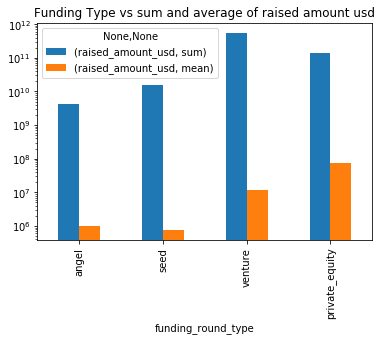

In [67]:
# A plot showing the fraction of total investments (globally)
# in venture, seed, and private equity, and the average amount of investment in each funding type.
master_frame_copy.groupby('funding_round_type').agg(['sum', 'mean']).loc[['angel', 'seed', 'venture', 'private_equity']].plot.bar(logy=True, title='Funding Type vs sum and average of raised amount usd')

### Plot 2

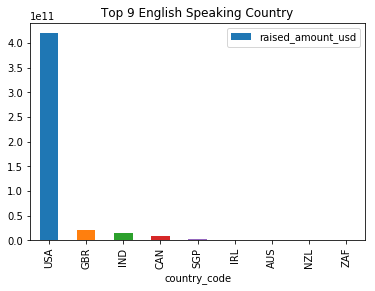

In [68]:
# A plot showing the top 9 countries against the total amount of investments of funding type FT. 
top9.plot.bar(x='country_code', y='raised_amount_usd', title='Top 9 English Speaking Country')

### Plot 3

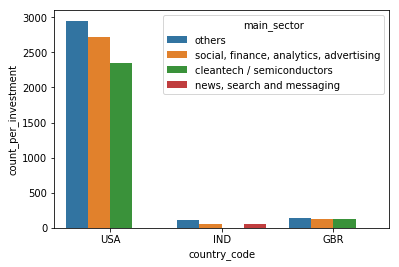

In [69]:
# Number of investments in the top 3 sectors of the top 3 countries
country_wise_sector = master_frame[master_frame.country_code.isin(['USA', 'GBR', 'IND']) & (master_frame.funding_round_type == 'venture')].groupby(['country_code','main_sector'], as_index=False)['raised_amount_usd'].count().sort_values(by=['country_code', 'raised_amount_usd'], ascending=False).reset_index(drop=True).iloc[[0,1,2,8,9,10,16,17,18]].reset_index(drop=True).rename(columns={'raised_amount_usd': 'count_per_investment'})
sns.barplot(x='country_code', y='count_per_investment', hue='main_sector', data=country_wise_sector)